<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/Analise_Performance_Loja/blob/main/Analise_Performance_Loja_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyr)
library(tidyverse)
library(forecast)

In [2]:
# Definir a opção para evitar notação científica
options(scipen = 999)

In [3]:
# Leitura dos dados
dados <- read_xlsx ("/dados.xlsx")
print(dados)

# A tibble: 2,926 × 4
   Loja    Ano Mes     Venda
   <chr> <dbl> <chr>   <dbl>
 1 1      2018 jan   299245.
 2 1      2018 fev   305991.
 3 1      2018 mar   329688.
 4 1      2018 abr   371206.
 5 1      2018 mai   325520.
 6 1      2018 jun   408801.
 7 1      2018 jul   411977.
 8 1      2018 ago   345155.
 9 1      2018 set   352072.
10 1      2018 out   371522.
# ℹ 2,916 more rows


In [17]:
# Calculando a média de vendas por loja e ano:

media_vendas <- dados %>%
  group_by(Loja, Ano) %>%
  summarize(Media_Venda = mean(Venda, na.rm = TRUE))
print(media_vendas)

`summarise()` has grouped output by 'Loja'. You can override using the
`.groups` argument.


# A tibble: 250 × 3
# Groups:   Loja [127]
   Loja    Ano Media_Venda
   <chr> <dbl>       <dbl>
 1 1      2018     375247.
 2 1      2019     389394.
 3 10     2018     366391.
 4 10     2019     371003.
 5 100    2018     447377.
 6 100    2019     464979.
 7 101    2018     424419.
 8 101    2019     481535.
 9 102    2018     377225.
10 102    2019     403068.
# ℹ 240 more rows


In [12]:
# Media de vendas em ordem decrescente para obter as 5 maiores médias
maiores_medias <- media_vendas %>%
  arrange(desc(Media_Venda)) %>%
  head(5)
# Média de vendas em ordem crescente para obter as 5 menores médias
menores_medias <- media_vendas %>%
  arrange(Media_Venda) %>%
  head(5)

In [15]:
# Criando uma tabela com as 5 maiores médias e as 5 menores médias
tabela_maiores_e_menores_medias <- rbind(maiores_medias, menores_medias)

tabela_maiores_e_menores_medias

Loja,Ano,Media_Venda
<chr>,<dbl>,<dbl>
11,2019,1668627.71
11,2018,1531852.30
30,2019,1402807.76
30,2018,1400069.56
43,2019,1371419.46
506,2018,6572.47
74,2019,148750.97
74,2018,149667.28
126,2019,158964.97


In [26]:
total_vendas_por_mes <- dados %>%
  mutate(Mes = factor(Mes, levels = c("jan", "fev", "mar", "abr", "mai", "jun", "jul", "ago", "set", "out", "nov", "dez"))) %>%
  group_by(Ano, Mes) %>%
  summarize(Total_Venda = sum(Venda, na.rm = TRUE)) %>%
  arrange(desc(Ano), Mes)

total_vendas_por_mes

`summarise()` has grouped output by 'Ano'. You can override using the `.groups`
argument.


Ano,Mes,Total_Venda
<dbl>,<fct>,<dbl>
2019,jan,38482034
2019,fev,36802944
2019,mar,41927951
2019,abr,46407122
2019,mai,54829505
2019,jun,55296428
2019,jul,58118926
2019,ago,55321520
2019,set,47137238


In [48]:
total_vendas_por_mes <- dados %>%
  mutate(Mes = factor(Mes, levels = c("jan", "fev", "mar", "abr", "mai", "jun", "jul", "ago", "set", "out", "nov", "dez"))) %>%
  group_by(Ano, Mes) %>%
  summarize(Total_Venda = sum(Venda, na.rm = TRUE)) %>%
  pivot_wider(names_from = Ano, values_from = Total_Venda)

total_vendas_por_mes <- total_vendas_por_mes %>%
  mutate(Diferenca = `2018` - `2019`)  # Substitua `2019` e `2020` pelos anos que deseja calcular a diferença

head(total_vendas_por_mes, 12)

`summarise()` has grouped output by 'Ano'. You can override using the `.groups`
argument.


Mes,2018,2019,Diferenca
<fct>,<dbl>,<dbl>,<dbl>
jan,37937854,38482034,-544180.96
fev,35077044,36802944,-1725900.10
mar,43852141,41927951,1924189.54
abr,45718812,46407122,-688309.35
mai,53586064,54829505,-1243440.68
jun,53769380,55296428,-1527047.76
jul,51740056,58118926,-6378870.33
ago,52839897,55321520,-2481623.36
set,47038121,47137238,-99116.93


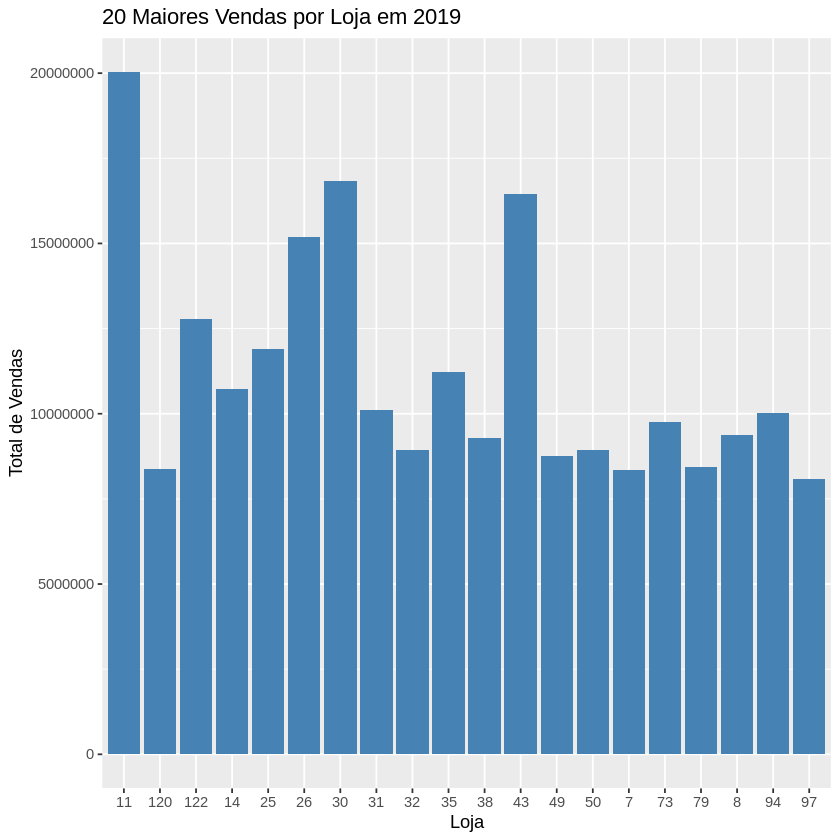

In [49]:
# Filtrar apenas os dados de 2019
vendas_2019 <- filter(dados, Ano == 2019)

# Calcular o total de vendas por loja em 2019
vendas_por_loja_2019 <- vendas_2019 %>%
  group_by(Loja) %>%
  summarize(Total_Venda = sum(Venda)) %>%
  arrange(desc(Total_Venda)) %>%
  head(20)

# Criar o gráfico de barras com as 20 maiores vendas por loja em 2019
ggplot(vendas_por_loja_2019, aes(x = factor(Loja), y = Total_Venda)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "20 Maiores Vendas por Loja em 2019", x = "Loja", y = "Total de Vendas")

# 1. Loja com melhor crescimento no Ano de 2019, em percentual de crescimento sobre ano anterior

*Aproveitei e calculei as lojas com menor crescimento*

In [50]:
# Filtrando os dados apenas para os anos de 2018 e 2019
dados_2018_2019 <- filter(dados, Ano %in% c(2018, 2019))

# Calcular o total de vendas para cada loja em 2018 e 2019
vendas_por_loja_2018 <- dados_2018_2019 %>%
  filter(Ano == 2018) %>%
  group_by(Loja) %>%
  summarize(Total_Venda_2018 = sum(Venda))

vendas_por_loja_2019 <- dados_2018_2019 %>%
  filter(Ano == 2019) %>%
  group_by(Loja) %>%
  summarize(Total_Venda_2019 = sum(Venda))

In [51]:
# Juntando os totais de vendas de 2018 e 2019 em um único dataframe
crescimento_por_loja <- left_join(vendas_por_loja_2019, vendas_por_loja_2018, by = "Loja")

# Calculando o percentual de crescimento entre 2018 e 2019 para cada loja
crescimento_por_loja <- crescimento_por_loja %>%
  mutate(Percentual_Crescimento = (Total_Venda_2019 - Total_Venda_2018) / Total_Venda_2018 * 100)



In [52]:
# Ordenando as lojas pelo percentual de crescimento em 2019
crescimento_por_loja <- crescimento_por_loja %>%
  arrange(desc(Percentual_Crescimento))

In [53]:
# Tabela com as 20 primeiras lojas de maior crescimento em 2019 comparado a 2018
tabela_melhores_lojas <- head(crescimento_por_loja, 20)
print(tabela_melhores_lojas)

# A tibble: 20 × 4
   Loja  Total_Venda_2019 Total_Venda_2018 Percentual_Crescimento
   <chr>            <dbl>            <dbl>                  <dbl>
 1 506           3149044.            6572.               47813.  
 2 141           6667934.         1966740.                 239.  
 3 136           3667945.         1085896.                 238.  
 4 140           5434691.         1961619.                 177.  
 5 139           4628846.         2191948.                 111.  
 6 107           3304020.         2514088.                  31.4 
 7 63            2588557.         2138800.                  21.0 
 8 64            5898779.         5026502.                  17.4 
 9 129           4572697.         3972967.                  15.1 
10 79            8440358.         7381929.                  14.3 
11 35           11226160.         9877111.                  13.7 
12 101           5778417.         5093031.                  13.5 
13 44            2890072.         2561451.               

In [54]:
# Ordenando as lojas pelo pior crescimento percentual em 2019 comparado a 2018
crescimento_por_loja <- crescimento_por_loja %>%
  arrange(Percentual_Crescimento)

# Mostrando a tabela com as 20 primeiras lojas com pior crescimento em 2019
tabela_melhores_lojas <- head(crescimento_por_loja, 20)
print(tabela_melhores_lojas)

# A tibble: 20 × 4
   Loja  Total_Venda_2019 Total_Venda_2018 Percentual_Crescimento
   <chr>            <dbl>            <dbl>                  <dbl>
 1 3             4026902.         5217404.                 -22.8 
 2 5             2823487.         3404184.                 -17.1 
 3 28            4426060.         5216176.                 -15.1 
 4 61            6008997.         7044964.                 -14.7 
 5 27            3563767.         4092827.                 -12.9 
 6 92            2466341.         2832466.                 -12.9 
 7 84            3352178.         3841990.                 -12.7 
 8 39            6802496.         7783564.                 -12.6 
 9 71            3285748.         3749345.                 -12.4 
10 85            2945563.         3331567.                 -11.6 
11 125           3134712.         3540015.                 -11.4 
12 86            4143045.         4667869.                 -11.2 
13 12            4730458.         5287322.               

# 2.Loja com melhor crescimento no 1º e 2º semestre de 2019, em percentual de crescimento sobre ano anterior;

In [55]:
# Separando os dados por semestre (1º e 2º semestre de 2019)
crescimento_por_loja_semestre <- crescimento_por_loja %>%
  mutate(Semestre = ifelse(substr(Loja, 1, 1) < "5", "1º Semestre", "2º Semestre"))

In [ ]:
# Calculando o percentual de crescimento por loja em cada semestre
crescimento_por_loja_semestre <- crescimento_por_loja_semestre %>%
  group_by(Loja, Semestre) %>%
  summarize(Percentual_Crescimento_Semestre = mean(Percentual_Crescimento))

In [57]:
# Encontrar a loja com o melhor crescimento em cada semestre
melhor_crescimento_por_semestre <- crescimento_por_loja_semestre %>%
  group_by(Semestre) %>%
  top_n(1, wt = Percentual_Crescimento_Semestre)

# Mostrar a tabela com a loja de melhor crescimento em cada semestre
print(melhor_crescimento_por_semestre)

# A tibble: 2 × 3
# Groups:   Semestre [2]
  Loja  Semestre    Percentual_Crescimento_Semestre
  <chr> <chr>                                 <dbl>
1 141   1º Semestre                            239.
2 506   2º Semestre                          47813.


# 3.Ranking das melhores lojas em percentual de crescimento de Dezembro 2019  (classificar da MELHOR PARA PIOR em % Crescimento sobre AA).

In [58]:
# Filtrando os dados apenas para o mês de dezembro de 2019
dados_dez_2019 <- filter(dados, Ano == 2019, Mes == "dez")

# Calculando o total de vendas para cada loja em dezembro de 2019 e em 2018
vendas_por_loja_dez_2019 <- dados_dez_2019 %>%
  group_by(Loja) %>%
  summarize(Total_Venda_dez_2019 = sum(Venda))

vendas_por_loja_2018 <- filter(dados, Ano == 2018) %>%
  group_by(Loja) %>%
  summarize(Total_Venda_2018 = sum(Venda))

In [59]:
# Juntando os totais de vendas de dezembro de 2019 e de 2018 em um único dataframe
crescimento_dez_2019 <- left_join(vendas_por_loja_dez_2019, vendas_por_loja_2018, by = "Loja")

# Calculando o percentual de crescimento de dezembro de 2019 em relação a 2018 para cada loja
crescimento_dez_2019 <- crescimento_dez_2019 %>%
  mutate(Percentual_Crescimento = (Total_Venda_dez_2019 - Total_Venda_2018) / Total_Venda_2018 * 100)

In [60]:
# filtrando apenas as lojas com percentual de crescimento positivo
ranking_positivo_melhores_lojas_dez_2019 <- crescimento_dez_2019 %>%
  filter(Percentual_Crescimento > 0) %>%
  arrange(desc(Percentual_Crescimento))

In [61]:
# Mostrando o ranking das melhores lojas em percentual de crescimento de dezembro de 2019
print(ranking_positivo_melhores_lojas_dez_2019)

# A tibble: 1 × 4
  Loja  Total_Venda_dez_2019 Total_Venda_2018 Percentual_Crescimento
  <chr>                <dbl>            <dbl>                  <dbl>
1 506                642544.            6572.                  9676.


In [62]:
# Ordenando as lojas pelo percentual de crescimento de dezembro de 2019
ranking_geral_melhores_lojas_dez_2019 <- crescimento_dez_2019 %>%
  arrange(desc(Percentual_Crescimento))
# Mostrar o ranking das melhores lojas em percentual de crescimento de dezembro de 2019
print(ranking_geral_melhores_lojas_dez_2019)

# A tibble: 127 × 4
   Loja  Total_Venda_dez_2019 Total_Venda_2018 Percentual_Crescimento
   <chr>                <dbl>            <dbl>                  <dbl>
 1 506                642544.            6572.                 9676. 
 2 141               1638075.         1966740.                  -16.7
 3 136                718612.         1085896.                  -33.8
 4 140                931177.         1961619.                  -52.5
 5 139                799390.         2191948.                  -63.5
 6 138               1725059.         6069576.                  -71.6
 7 1                 1202593.         4502960.                  -73.3
 8 122               3010380.        11552476.                  -73.9
 9 63                 554858.         2138800.                  -74.1
10 135               1437992.         5862070.                  -75.5
# ℹ 117 more rows


#Analises preditivas

*Vamos trabalhar com algumas possibilidades de analises preditivas.*

In [69]:
# Criar uma série temporal
ts_data <- ts(dados$Venda, frequency = 12, start = c(2018, 1))

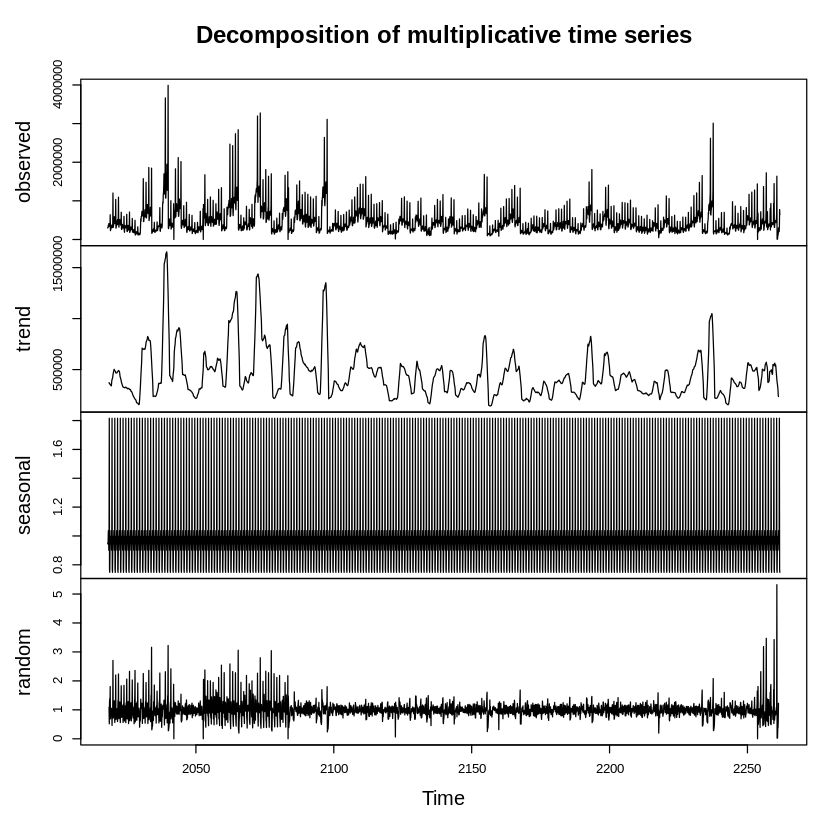

In [71]:
# Decompor a série temporal
decomposed <- decompose(ts_data, type = "multiplicative")

# Plot da decomposição
plot(decomposed)

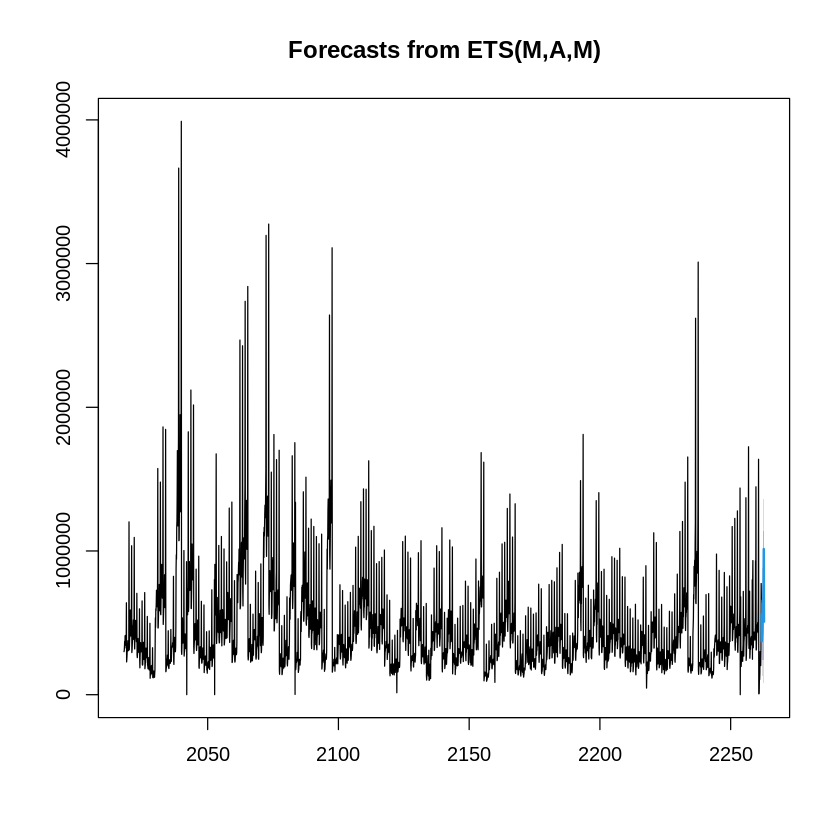

In [78]:
# Acessar a série temporal da decomposição
ts_decomposed <- ts(decomposed$x - decomposed$seasonal, frequency = 12, start = c(2018, 1))

# Previsão sazonal
forecast_result <- forecast(ts_decomposed, h = 12)  # Previsão para 12 meses à frente
plot(forecast_result)

In [80]:
# Criar um modelo de regressão linear
modelo <- lm(Venda ~ Ano + Mes, data = dados)

# Sumário do modelo
summary(modelo)


Call:
lm(formula = Venda ~ Ano + Mes, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-972583 -155450  -59538   69783 3006855 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) -7656927   21032265  -0.364              0.71584    
Ano             3983      10420   0.382              0.70232    
Mesago         61012      25587   2.384              0.01717 *  
Mesdez        598923      25434  23.548 < 0.0000000000000002 ***
Mesfev        -84008      25666  -3.273              0.00108 ** 
Mesjan        -65170      25666  -2.539              0.01116 *  
Mesjul         69813      25613   2.726              0.00645 ** 
Mesjun         66549      25613   2.598              0.00942 ** 
Mesmai         63873      25613   2.494              0.01269 *  
Mesmar        -26331      25666  -1.026              0.30501    
Mesnov        109817      25484   4.309            0.0000169 ***
Mesout         34038      25509   1.334              0.182

In [81]:
# Transformar o mês em fator
dados$Mes <- factor(dados$Mes, levels = c("jan", "fev", "mar", "abr", "mai", "jun", "jul", "ago", "set", "out", "nov", "dez"))

In [84]:
# Separar os dados por ano
dados_2018 <- filter(dados, Ano == 2018)
dados_2019 <- filter(dados, Ano == 2019)

# Criar modelos de regressão linear para 2018 e 2019
modelo_2018 <- lm(Venda ~ Mes, data = dados_2018)
modelo_2019 <- lm(Venda ~ Mes, data = dados_2019)

In [85]:
# Sumário dos modelos
summary(modelo_2018)
summary(modelo_2019)


Call:
lm(formula = Venda ~ Mes, data = dados_2018)

Residuals:
    Min      1Q  Median      3Q     Max 
-937663 -151620  -55244   72388 2720169 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   321507      25101  12.809 < 0.0000000000000002 ***
Mesfev        -24244      35498  -0.683             0.494732    
Mesmar         50121      35498   1.412             0.158183    
Mesabr         65940      35498   1.858             0.063434 .  
Mesmai        132612      35498   3.736             0.000195 ***
Mesjun        134166      35498   3.780             0.000164 ***
Mesjul        116968      35498   3.295             0.001008 ** 
Mesago        122526      35423   3.459             0.000558 ***
Messet         73771      35423   2.083             0.037469 *  
Mesout         90794      35277   2.574             0.010161 *  
Mesnov        153452      35206   4.359             0.000014 ***
Mesdez        622728      35135  17.724 < 0.000000000000000


Call:
lm(formula = Venda ~ Mes, data = dados_2019)

Residuals:
    Min      1Q  Median      3Q     Max 
-697946 -157835  -65485   67546 2973034 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   312862      26196  11.943 < 0.0000000000000002 ***
Mesfev        -13651      37046  -0.368             0.712560    
Mesmar         28016      37046   0.756             0.449628    
Mesabr         64432      37046   1.739             0.082202 .  
Mesmai        125774      36898   3.409             0.000670 ***
Mesjun        129509      36898   3.510             0.000462 ***
Mesjul        152089      36898   4.122          0.000039650 ***
Mesago        129710      36898   3.515             0.000452 ***
Messet         64236      36898   1.741             0.081905 .  
Mesout        107282      36825   2.913             0.003630 ** 
Mesnov        195782      36825   5.317          0.000000122 ***
Mesdez        704098      36753  19.157 < 0.000000000000000